In [17]:
import warnings
warnings.filterwarnings('ignore')

# **Problem Statement**

Analyze and explore employee salaries across various industries, job roles, and regions. The goal is to identify patterns, trends, and correlations in the dataset, including the impact of factors such as experience level, employment type, remote work, and company size on salaries. This dataset provides valuable insights for salary trend analysis, predictive modeling, and data-driven decision-making.

### **Data Description**

| *Field*            | *Description*                                                                               |
|-----------------------|-----------------------------------------------------------------------------------------------|
| *work_year*         | The year of employment.                                                                       |
| *experience_level*  | The experience level of the employee (e.g., entry-level, mid-level, senior).                  |
| *employment_type*   | The type of employment (e.g., full-time, part-time, contract).                                |
| *job_title*         | The job title or position of the employee within the company.                                 |
| *salary*            | The salary amount in the local currency.                                                     |
| *salary_currency*   | The currency in which the salary is denoted.                                                 |
| *salary_in_usd*     | The equivalent salary amount in USD (United States Dollars).                                  |
| *employee_residence*| The location of the employee's residence.                                                    |
| *remote_ratio*      | The percentage of remote work allowed for the position.                                       |
| *company_location*  | The location of the company.                                                                 |
| *company_size*      | The size of the company (e.g., small, medium, large).

### **Library Importation**

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
data = pd.read_csv('ds_salaries.csv')

In [20]:
data.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [21]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


INFERENCE :
1. We Have 4 Numerical Columns and 8 Categorical Columns

2. Column named 'Unnamed : 0' is just index so we can drop this further

In [23]:
data.shape

(607, 12)

INFERENCES :

1. data have 607 rows
2. data have 12 columns

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


INFERENCE :
1. We total have 607 rows in our data and all columns have 607 values means no null Value

2. salary column may have extreme values 

3. salary in usd column may also have extreme values



In [25]:
data.describe(include=object).T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


In [26]:
data = data.drop(columns = 'Unnamed: 0')

In [27]:
cat_cols = ['work_year', 'experience_level', 'employment_type',
       'job_title', 'salary_currency', 
       'employee_residence', 'company_location','remote_ratio',
       'company_size']

num_cols = ['salary_in_usd', 'salary']

<Axes: >

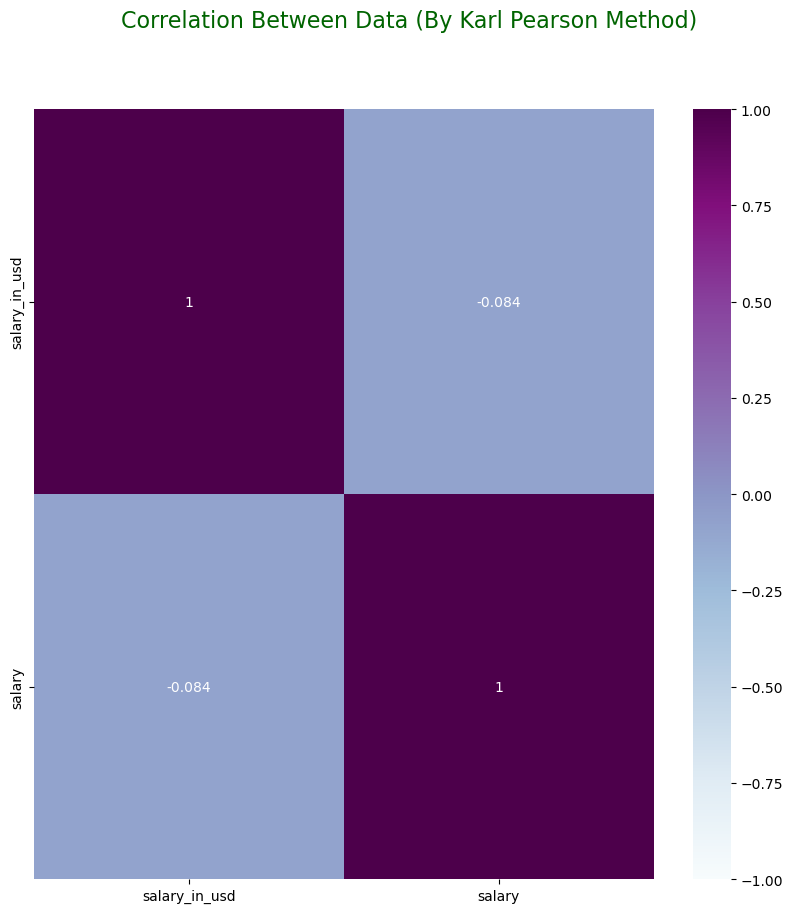

In [28]:
plt.figure(figsize=(10,10))
plt.suptitle('Correlation Between Data (By Karl Pearson Method)', size = 16, color = 'darkgreen')
sns.heatmap(data = data[num_cols].corr(), vmax = +1, vmin = -1, annot= True, cmap = 'BuPu')

INFERENCES :

1. Salary and Salary in USD are nearly independently to each other


# **Univariate Analysis**

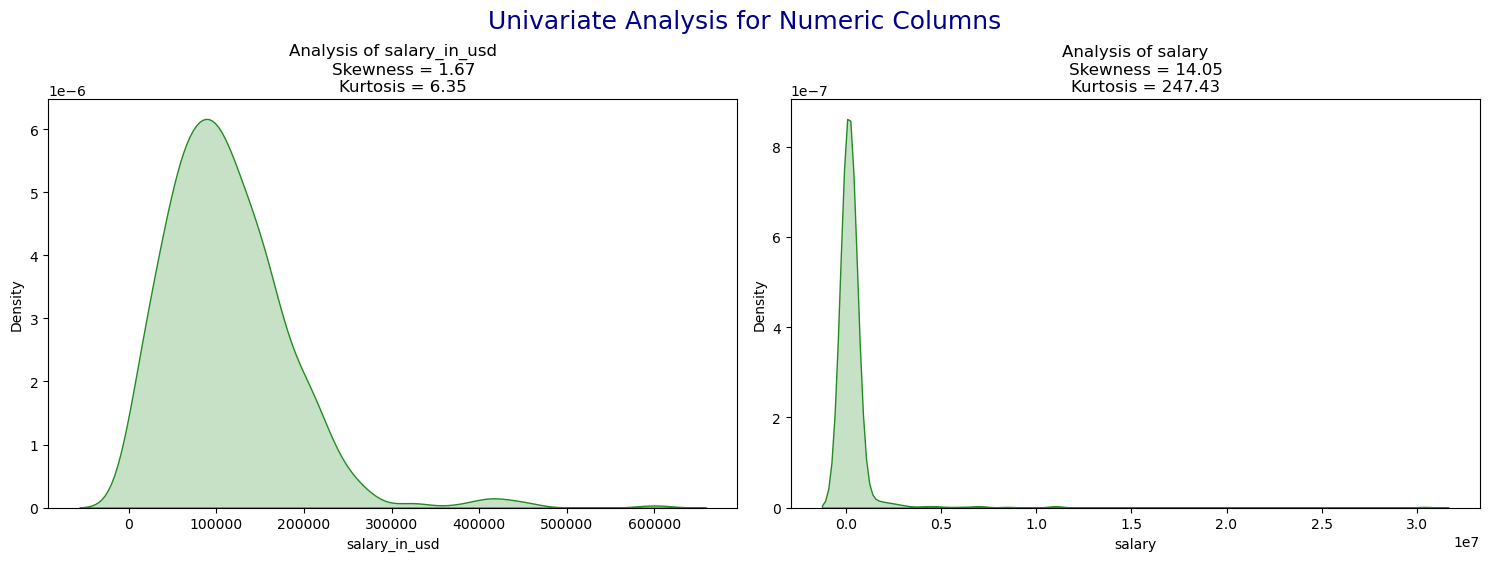

In [29]:
t = 1
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis for Numeric Columns', size = 18, color = 'darkblue' )
for i in num_cols:
    plt.subplot(2,2,t)
    sns.kdeplot(data=data[num_cols], x = i, fill=True, color = 'forestgreen')
    plt.title(f'''Analysis of {i}
    Skewness = {round(data[i].skew(),2)}
    Kurtosis = {round(data[i].kurt(),2)}''')
    t += 1

plt.tight_layout()
plt.show()


INFERENCES :

1. Range of Salary in USD is very good.

2. Few have very extreme Salaries (positive outliers).

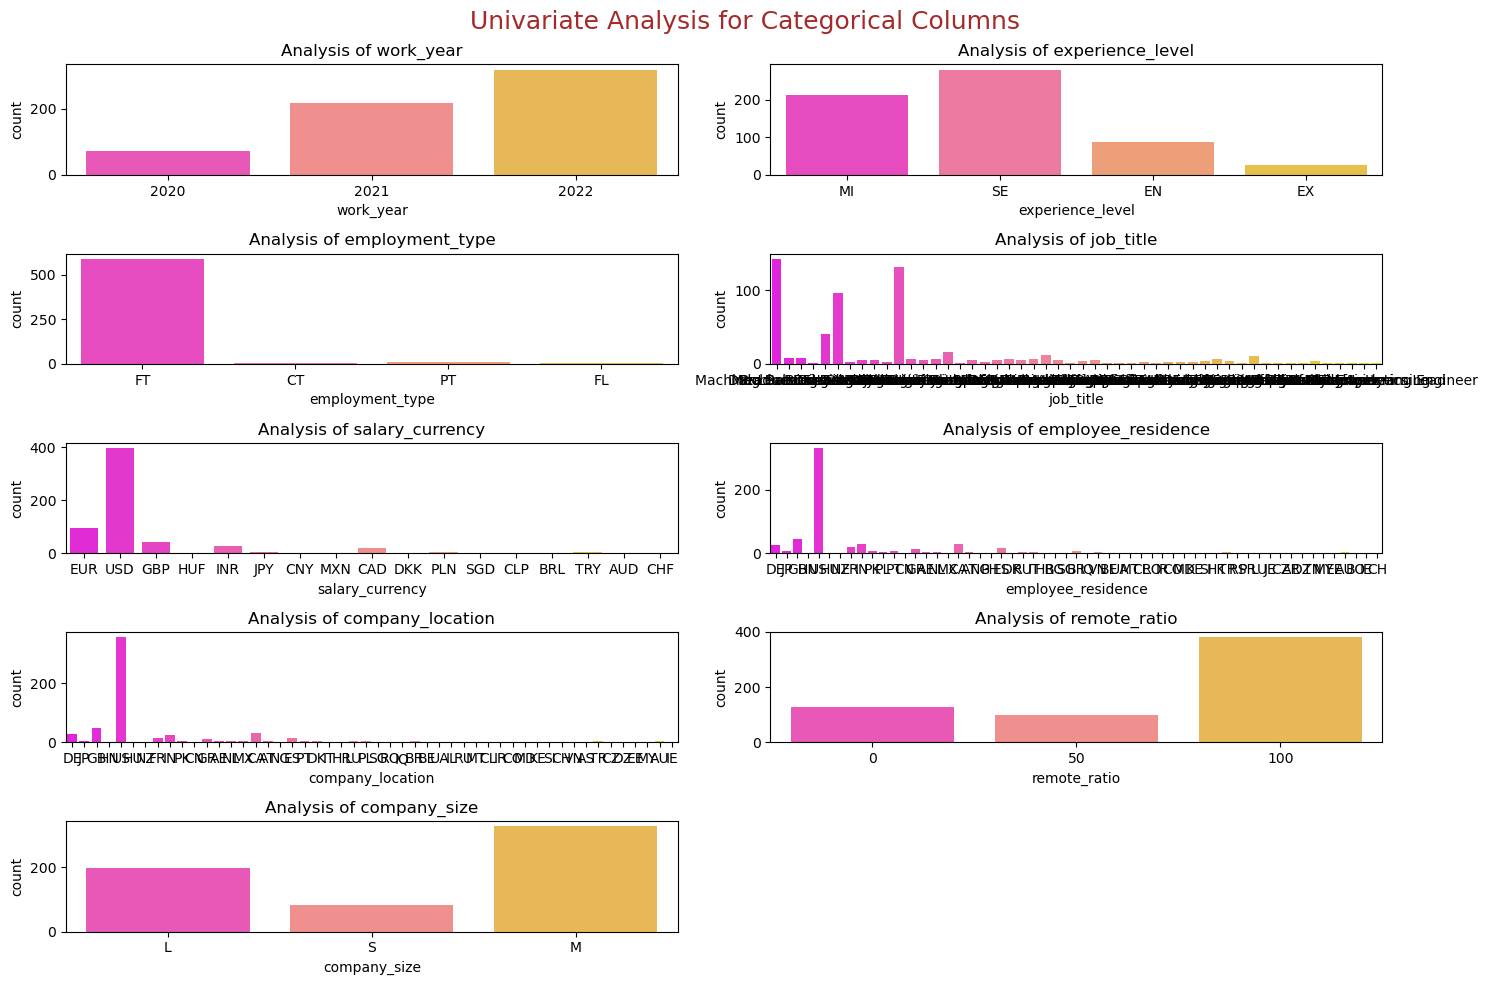

In [30]:
t = 1
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis for Categorical Columns', size = 18, color = 'brown')
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(data=data[cat_cols], x = i,palette='spring')
    plt.title(f'''Analysis of {i}''')
    t += 1

plt.tight_layout()
plt.show()


NFERENCES :

1. Most People Have FT employment Type

2. Most People are SE

3. Mostly Company are of Medium Size

4. Maximum People got their salaries in USD

5. We have Maximum Data from 2022 work year

## **Bivariate Analysis**

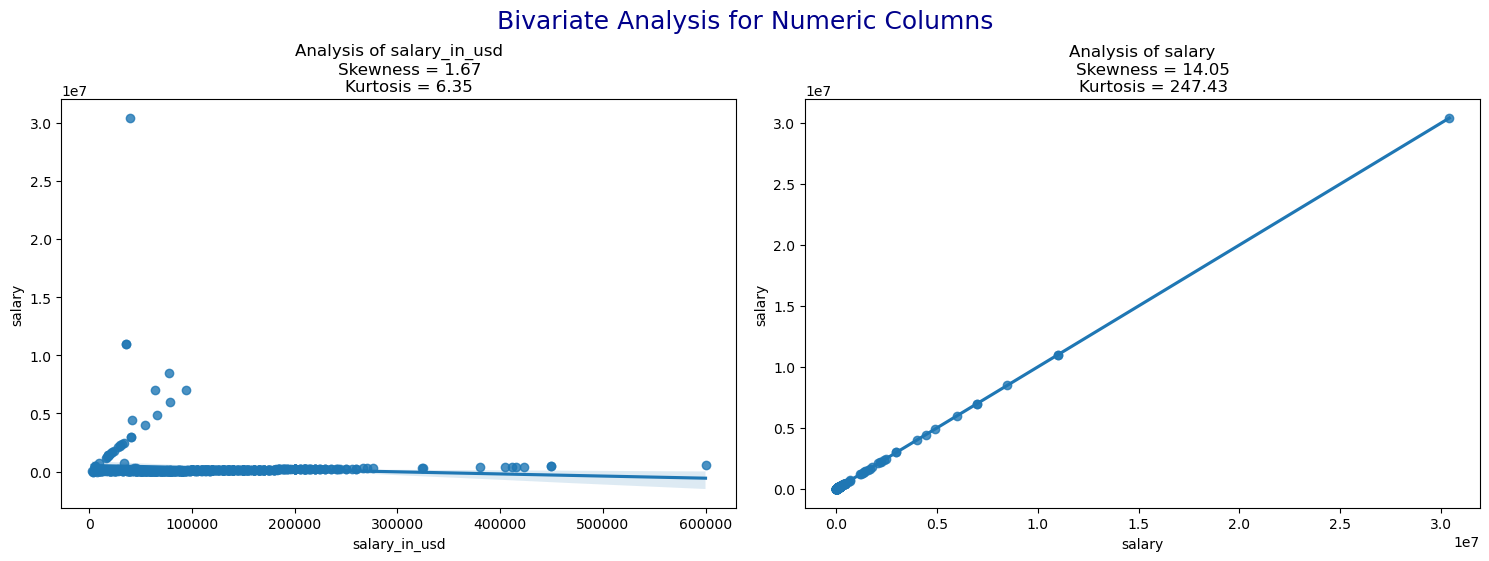

In [31]:
t = 1
plt.figure(figsize=(15,10))
plt.suptitle('Bivariate Analysis for Numeric Columns', size = 18, color = 'darkblue' )
for i in num_cols:
    plt.subplot(2,2,t)
    sns.regplot(data, x = i, y = 'salary')
    plt.title(f'''Analysis of {i}
    Skewness = {round(data[i].skew(),2)}
    Kurtosis = {round(data[i].kurt(),2)}''')
    t += 1

plt.tight_layout()
plt.show()


#### WE WILL CONSIDER SALARIES IN USD AS IT GIVES A LEVEL FIELD FOR ANALYSIS.

<Figure size 1500x1500 with 0 Axes>

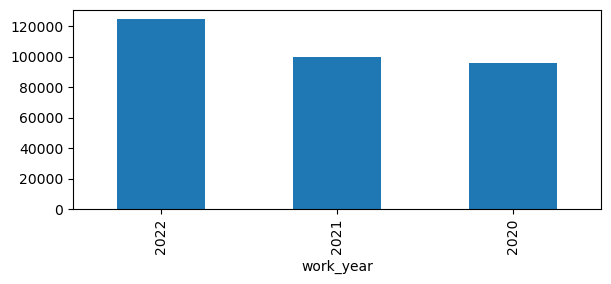

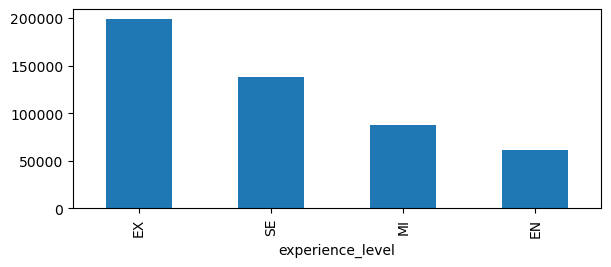

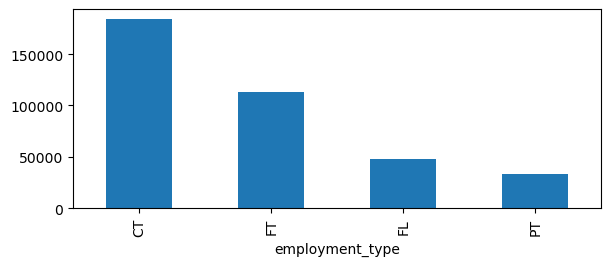

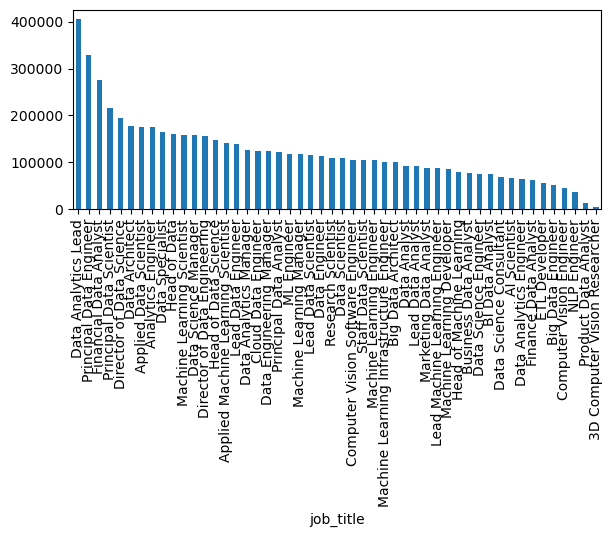

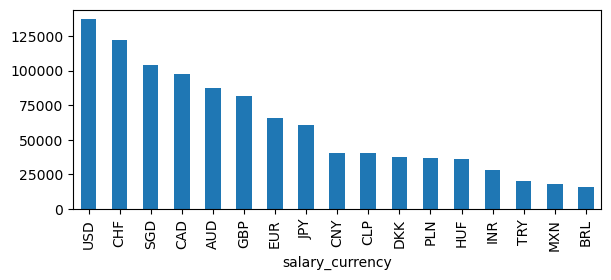

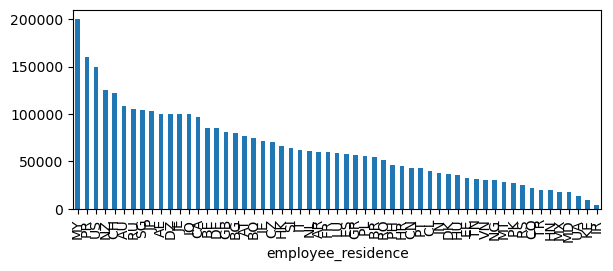

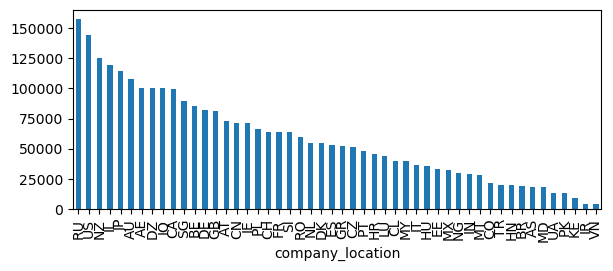

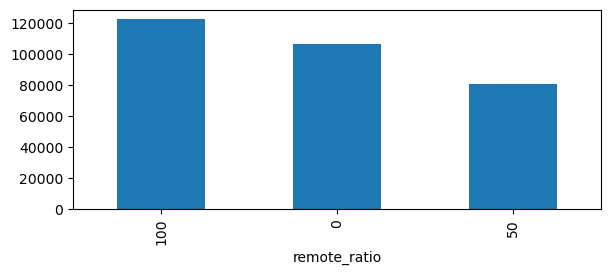

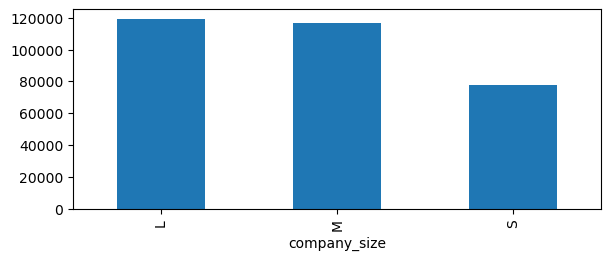

In [40]:
t = 1
plt.figure(figsize=(15,15))
plt.suptitle('Biivariate Analysis for Categorical Columns', size = 18, color = 'brown')
for i in cat_cols:
    plt.figure(figsize=(15,15))
    plt.subplot(5,2,t)
    data.groupby(by = i)['salary_in_usd'].mean().sort_values(ascending=False).plot(kind = 'bar')
    
    plt.show()
    t += 1




Inferences :

1. Most People are from 2022 work year are getting High Salaries.

2. Experience Level and Employment type affects Salaries.

3. Large Company offers high Salaries 

4. Companies Offer 100% remote work also provide good pay But Surprisingly Company Offers 50%$ remote gives low Salaries companies with 0% remote.

5. Job Title Head of Data Analytics Lead got maximum Pay.

6. Employees earning in USD have very high pay.


## Outlier Detections

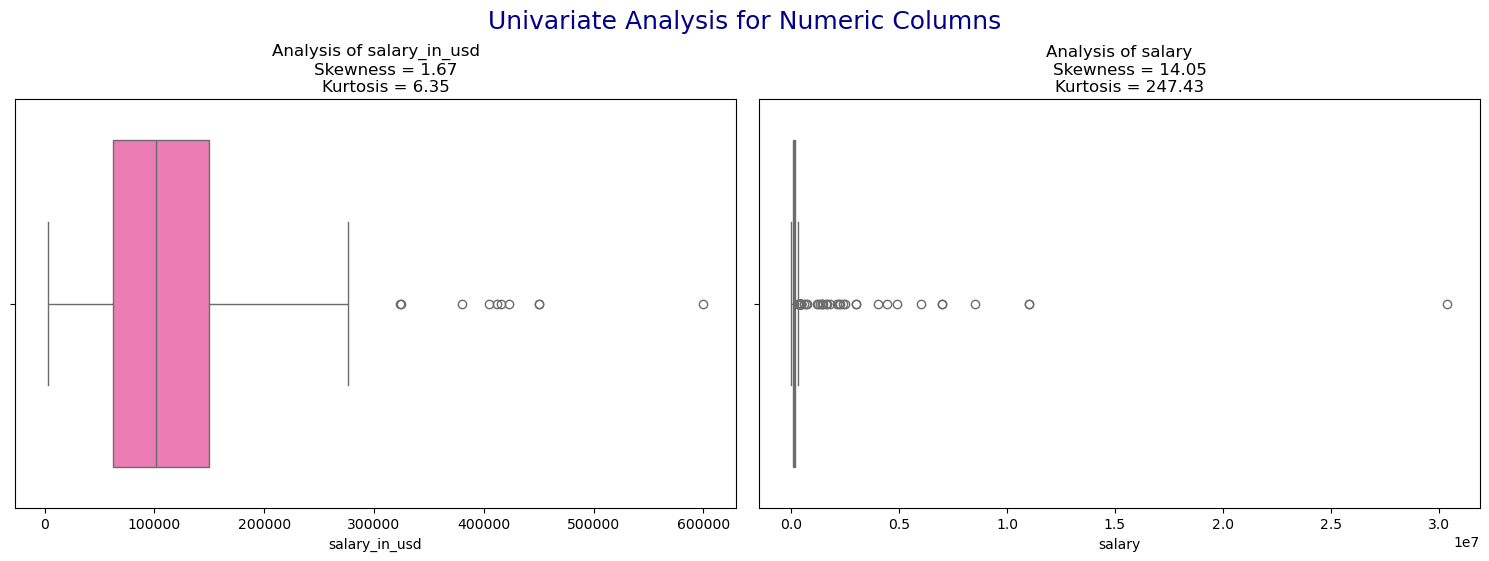

In [41]:
t = 1
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis for Numeric Columns', size = 18, color = 'darkblue' )
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data[num_cols], x = i, color = 'hotpink')
    plt.title(f'''Analysis of {i}
    Skewness = {round(data[i].skew(),2)}
    Kurtosis = {round(data[i].kurt(),2)}''')
    t += 1

plt.tight_layout()
plt.show()

Although We have Outliers but they are in Salary Columns so we will keep them as it is.

## Null Value Treatment

In [36]:
data.isnull().sum().sum()

0

## Duplicates Detection

In [38]:
data.duplicated().sum()

42

In [42]:
data.drop_duplicates(inplace= True)

In [43]:
data.duplicated().sum()

0

Inference :

- We have 42 duplicate values we decided to drop them 

# NOW AFTER DOING ENCODING ACCORDINGLY THIS DATA IS FULLY READY FOR MACHINE LEARNING MODELS
